In [1]:
from class_utils2_DQN import dqn_agent 
import numpy as np
import gym 

env = gym.make("LunarLander-v2")

obs_space = env.observation_space
action_space = env.action_space

episode_num = 250


#--------------------dqn agent parameters-----------------------------
gamma = 0.99
epsilon = 1.0
epsilon_dec = 0.996
epsilon_end = 0.1
buffer_size = 32000
batch_size = 32
learning_rate = 0.001 #by default = 0.001 change by passing in Adam(lr=learning_rate)
#--------------------dqn agent parameters-----------------------------

total_scores = []
mean_scores = []
agent = dqn_agent(gamma, epsilon, buffer_size, batch_size, epsilon_dec, epsilon_end)    #takes in gamma episilon and buffer size of memory and batch_size. learning rate(alpha) can be passed

for episode_count in range(episode_num):
    terminal = False
    score = 0
    state, dummy = env.reset()
    action_count = 0
    while not terminal:
        action, action_array = agent.choose_action(state)

        next_state, reward, terminal, dummy2, dummy3 = env.step(action)
        agent.store(state, action, reward, next_state, terminal)
        score += reward
        state = next_state
    
        epsilon = agent.calculate()
        if(action_count >= 400):
            break
        action_count += 1
    total_scores.append(score)
    mean = np.mean(total_scores)
    mean_scores.append(mean)
    print("episode: ", episode_count, " score: ", score, " mean score: ", mean)

agent.save_vals()

c:\Users\alexa\miniconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
episode:  0  score:  -88.14138961258098  mean score:  -88.14138961258098
episode:  1  score:  -215.7959373721674  mean score:  -151.9686634923742
episode:  2  score:  -594.3665180277237  mean score:  -299.43461500415737
episode:  3  score:  -221.0345913256121  mean score:  -279.83460908452105
episode:  4  score:  -326.2564897973273  mean score:  -289.1189852270823
episode:  5  score:  -89.09011090329521  mean score:  -255.78083950645112
episode:  6  score:  -171.8156503758112  mean score:  -243.78581248778826
episode:  7  score:  -236.78838452835546  mean score:  -242.91113399285916
episode:  8  score:  -149.4801763088007  mean score:  -232.52991647240822
episode:  9  score:  -52.611560336658165  mean score:  -214.53808085883324
episode:  10  score:  -15.952114573234454  mean score:  -196.48481119650612
episode:  11  score:  -52.243082914200215  mean score:  -184.46466717298063
episode:  12  score:  -8.135693122333663  mean 

In [3]:
print(len(mean_scores))
print(len(total_scores))

250
250


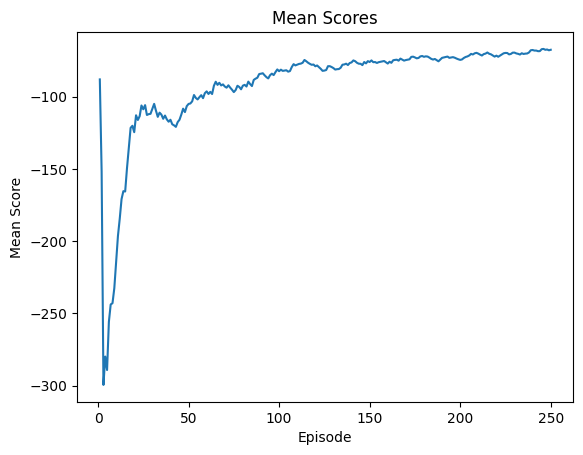

In [5]:
import matplotlib.pyplot as plt

x_axis = list(range(1, 251))
y_axis = mean_scores

plt.plot(x_axis, y_axis)
plt.title('Mean Scores')
plt.xlabel('Episode')
plt.ylabel('Mean Score')
plt.show()

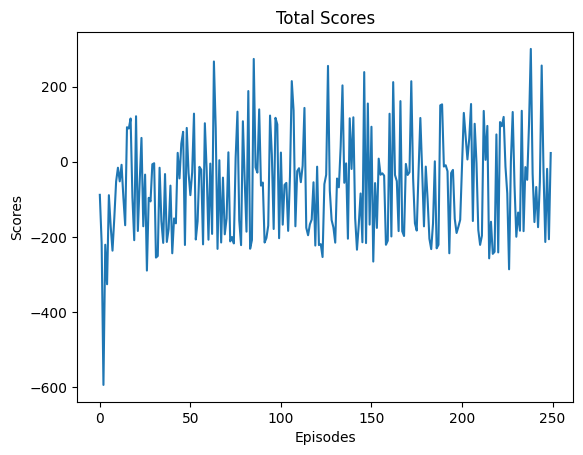

In [6]:
x_axis = list(range(0, 250))
y_axis = total_scores

plt.plot(x_axis, y_axis)
plt.title('Total Scores')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.show()

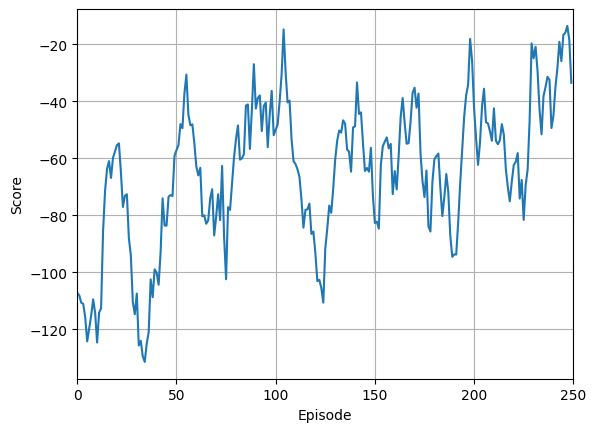

In [7]:
import numpy as np

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = list(range(0, 250))
y = total_scores

y_av = movingaverage(y, 20)
plt.plot(x, y_av)
plt.xlim(0,250)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.grid(True)
plt.show()